In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV # Ajout de RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
# CELL 2: Load the datasets
# Here, we load the training data, test data, and the ground truth RUL values.


train_file = 'C:/Users/schaf/Documents/International Exchange ICAM 5/Cranfield courses/Applied-Artificial-Intelligence-2025-26--2025-Oct-13_08-31-41-327/Statistical Learning Methods/Assignment data and codes/data/train_selected.csv'
test_file = 'C:/Users/schaf/Documents/International Exchange ICAM 5/Cranfield courses/Applied-Artificial-Intelligence-2025-26--2025-Oct-13_08-31-41-327/Statistical Learning Methods/Assignment data and codes/data/test_selected.csv'
truth_file = 'C:/Users/schaf/Documents/International Exchange ICAM 5/Cranfield courses/Applied-Artificial-Intelligence-2025-26--2025-Oct-13_08-31-41-327/Statistical Learning Methods/Assignment data and codes/data/PM_truth.txt'


try:
    # Load training data, specifying separator, decimal, and reading the header
    train_df = pd.read_csv(train_file, sep=';', decimal=',')
    
    # Load test data, specifying separator, decimal, and reading the header
    test_df = pd.read_csv(test_file, sep=';', decimal=',')
    
    # Load ground truth data (this file has no header)
    truth_df = pd.read_csv(truth_file, header=None, names=['RUL_true'])

    print("Data loaded successfully.")
    print("\nTraining Data Head:")
    print(train_df.head())
    print("\nTest Data Head:")
    print(test_df.head())
    print("\nTruth Data Head:")
    print(truth_df.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print(f"Could not find file: {e.filename}")
    print("Please make sure the absolute path in the script is correct and you have changed \\ to /.")
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    print("Please check the file formats and delimiters.")

Data loaded successfully.

Training Data Head:
   id  cycle       s1      s2     s3      s4  ttf  label_bnc
0   1      1  1400.60  554.36  47.47  521.66  191          0
1   1      2  1403.14  553.75  47.49  522.28  190          0
2   1      3  1404.20  554.26  47.27  522.42  189          0
3   1      4  1401.87  554.45  47.13  522.86  188          0
4   1      5  1406.22  554.00  47.28  522.19  187          0

Test Data Head:
   id  cycle       s1      s2     s3      s4
0   1     31  1398.91  554.42  47.23  521.79
1   2     49  1410.83  553.52  47.67  521.74
2   3    126  1418.89  552.59  47.88  520.83
3   4    106  1406.88  552.64  47.65  521.88
4   5     98  1419.36  553.29  47.46  521.00

Truth Data Head:
   RUL_true
0       112
1        98
2        69
3        82
4        91


In [3]:
# CELL 3: Define Features (X) and Target (y)
#
# We select the columns to be used as features (the sensors)
# and the column to be used as the target (the RUL).
#
# --- NOTE ---
# We are now using the 'ttf' column directly from train_selected.csv
# as our target (y_train). The old Cell 3 (manual RUL calculation)
# has been removed as it is not needed.

# Define the sensor columns to be used as features
sensor_cols = ['cycle', 's3', 's4']
# You could also add 'cycle' here if you want to use it as a feature
# sensor_cols = ['cycle', 's1', 's2', 's3', 's4']

try:
    # --- Training Set ---
    # X_train: Features from the training data (sensor values)
    X_train = train_df[sensor_cols]
    # y_train: Target from the training data (time-to-failure)
    y_train = train_df['ttf']
    
    # --- Test Set ---
    # X_test: Features from the test data (sensor values)
    X_test = test_df[sensor_cols]
    
    # y_test_true: The "ground truth" target values for the test set
    y_test_true = truth_df['RUL_true']
    
    print("Features and target variables defined.")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test_true shape: {y_test_true.shape}")

except KeyError as e:
    print(f"Error: Column {e} not found.")
    print("Please check the `sensor_cols` list and that the 'ttf' column exists in your training data.")
except Exception as e:
    print(f"An error occurred: {e}")

Features and target variables defined.
X_train shape: (20631, 3)
y_train shape: (20631,)
X_test shape: (100, 3)
y_test_true shape: (100,)


Starting model comparison loop (using RidgeCV with alphas=[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02])...

--- TESTING DEGREE: 2 (RidgeCV) ---
Training RidgeCV (Degree=2)...
Model training complete. Best alpha found: 10.0
Making predictions on test data...
Predictions made.

--- Model Performance (Degree=2, RidgeCV, alpha=10.0) ---
R-squared (R2): 0.5576
Mean Absolute Error (MAE): 22.9689
Root Mean Squared Error (RMSE): 27.6411
---------------------------------

--- TESTING DEGREE: 3 (RidgeCV) ---
Training RidgeCV (Degree=3)...
Model training complete. Best alpha found: 10.0
Making predictions on test data...
Predictions made.

--- Model Performance (Degree=3, RidgeCV, alpha=10.0) ---
R-squared (R2): 0.5728
Mean Absolute Error (MAE): 22.3798
Root Mean Squared Error (RMSE): 27.1600
---------------------------------

--- TESTING DEGREE: 4 (RidgeCV) ---
Training RidgeCV (Degree=4)...
Model training complete. Best alpha found: 10.0
Making predictions on test data...
Predictions made.

--- Model P

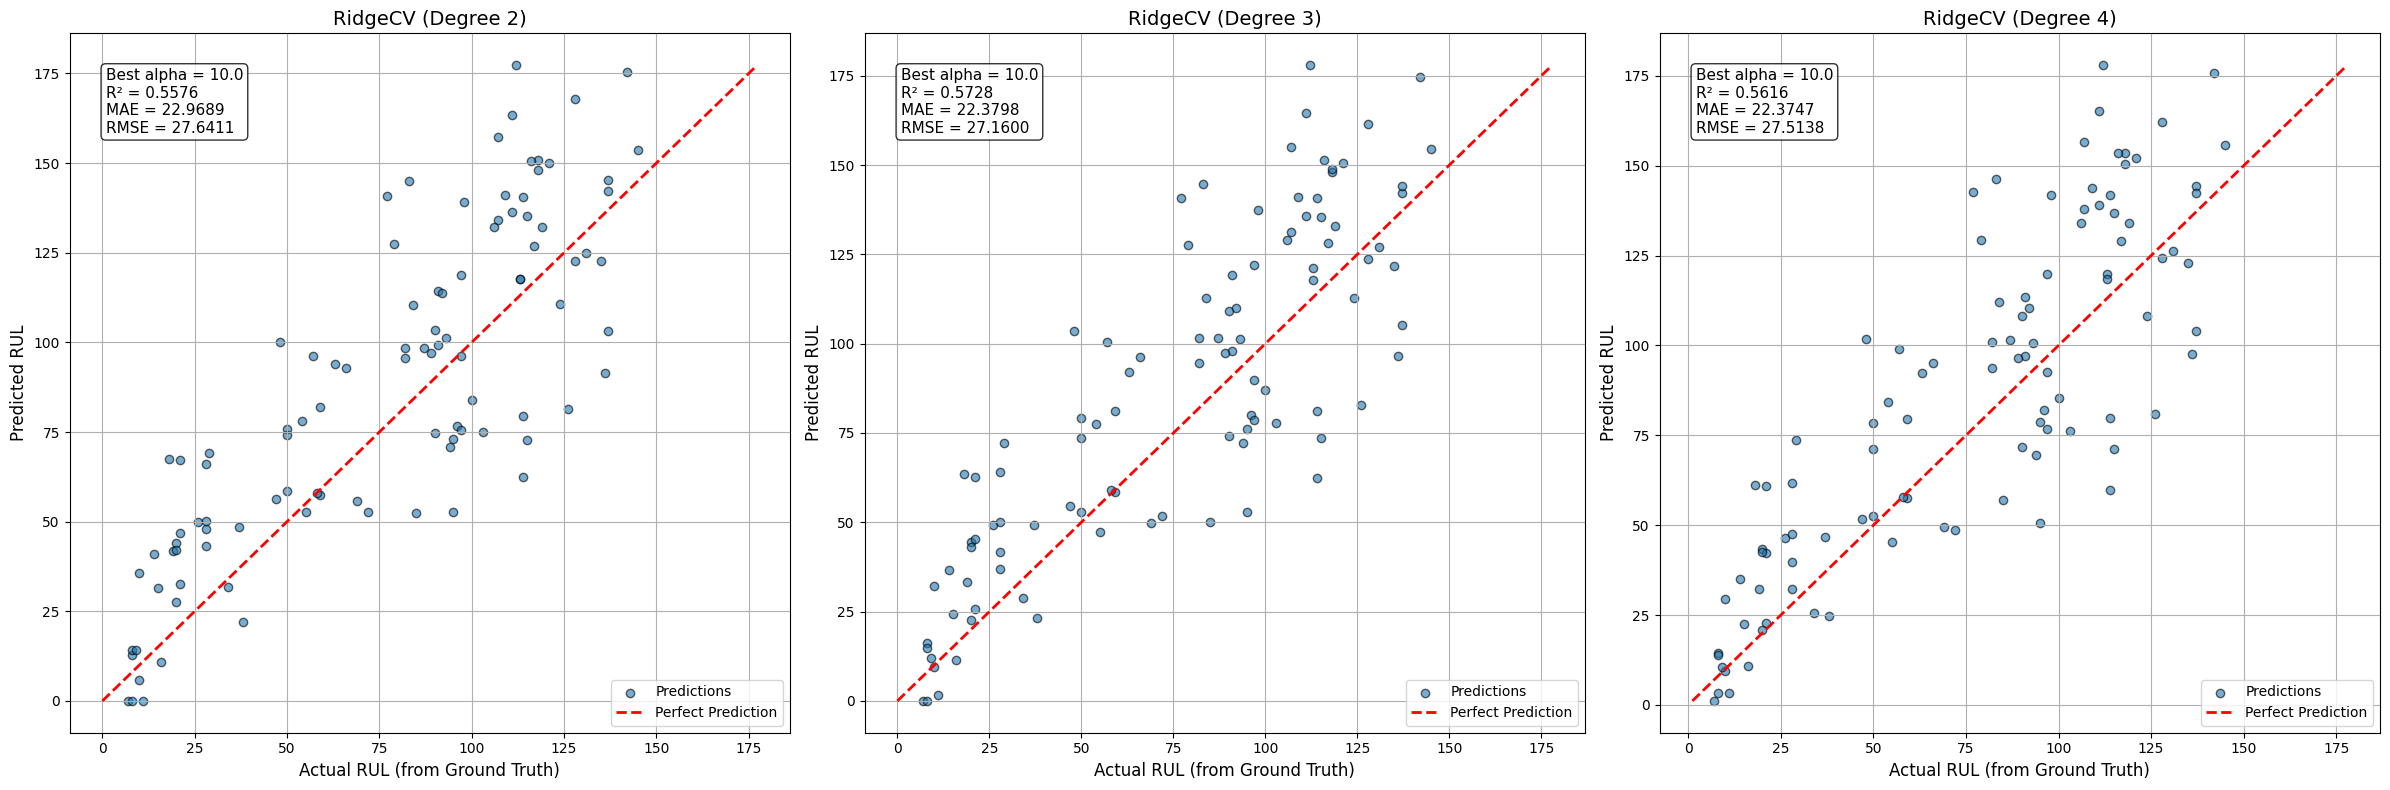

In [ ]:
# CELL 4: Loop, Train, Evaluate, and Plot using RidgeCV
#
# This cell tests degrees 2, 3, and 4.
# It now uses RidgeCV to *automatically find the best alpha*
# for each degree using cross-validation.

# List of polynomial degrees to test
degrees_to_test = [2, 3, 4]

# List of alphas for RidgeCV to try
# np.logspace(-2, 2, 5) génère 5 points sur une échelle log
# entre 10^-2 (0.01) et 10^2 (100).
# Cela équivaut à [0.01, 0.1, 1.0, 10.0, 100.0]
alphas_to_try = np.logspace(-2, 2, 5)

print(f"Starting model comparison loop (using RidgeCV with alphas={alphas_to_try})...")

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Use enumerate to get both the index (i) and the degree
for i, poly_degree in enumerate(degrees_to_test):
    
    print(f"\n--- TESTING DEGREE: {poly_degree} (RidgeCV) ---")
    
    try:
        # 1. Create the pipeline with RidgeCV
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
            ('model', RidgeCV(alphas=alphas_to_try)) # Utilisation de RidgeCV
        ])

        # 2. Train the model
        # RidgeCV trouvera le meilleur alpha pendant .fit()
        print(f"Training RidgeCV (Degree={poly_degree})...")
        pipeline.fit(X_train, y_train)
        
        # Récupérer le meilleur alpha trouvé
        best_alpha = pipeline.named_steps['model'].alpha_
        print(f"Model training complete. Best alpha found: {best_alpha}")

        # 3. Make predictions (uses the model with the best alpha)
        print("Making predictions on test data...")
        y_pred = pipeline.predict(X_test)
        
        # Optional: Ensure predictions are non-negative
        y_pred[y_pred < 0] = 0
        print("Predictions made.")

        # 4. Evaluate performance
        r2 = r2_score(y_test_true, y_pred)
        mae = mean_absolute_error(y_test_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
        
        print(f"\n--- Model Performance (Degree={poly_degree}, RidgeCV, alpha={best_alpha}) ---")
        print(f"R-squared (R2): {r2:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print("---------------------------------")

        # 5. Plot the results on the specific axis (axes[i])
        ax = axes[i] # Get the current subplot
        
        ax.scatter(y_test_true, y_pred, alpha=0.6, edgecolors='k', label='Predictions')
        
        # Add a line for perfect prediction (y=x)
        min_val = min(y_test_true.min(), y_pred.min())
        max_val = max(y_test_true.max(), y_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        
        ax.set_xlabel('Actual RUL (from Ground Truth)', fontsize=12)
        ax.set_ylabel('Predicted RUL', fontsize=12)
        ax.set_title(f'RidgeCV (Degree {poly_degree})', fontsize=14) # Titre mis à jour
        ax.legend(fontsize=10)
        ax.grid(True)
        
        # Add metrics to the plot, including the best alpha
        metrics_text = (
            f"Best alpha = {best_alpha}\n"
            f"R² = {r2:.4f}\n"
            f"MAE = {mae:.4f}\n"
            f"RMSE = {rmse:.4f}"
        )
        ax.text(0.05, 0.95, metrics_text, transform=ax.transAxes,
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    except Exception as e:
        print(f"An error occurred during processing for degree {poly_degree}: {e}")
        if 'axes' in locals(): # Check if axes exists
            axes[i].set_title(f"Error for Degree {poly_degree}")
            axes[i].text(0.5, 0.5, f"Error: {e}", 
                         transform=axes[i].transAxes, 
                         ha='center', va='center', color='red')

# After the loop, apply tight_layout and show the single figure
print("\n--- Model comparison loop finished. ---")
plt.tight_layout() # Adjusts plots to prevent overlap
plt.show() # Show the entire figure with all subplots